<a href="https://colab.research.google.com/github/Hannah-zzz/Crimecount-rate-Chicago/blob/main/Crime_count_and_rate_in_Chiacago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS145: Project 3 | Factors that Influence the Crime Count and Rate in Chicago.


## Collaborators:
Please list the names and SUNet IDs of your collaborators below:
* *Name: Anqi Zhu
* *Name: Bihan Liu

## Project Overview

---

The main question we are trying to find answer to is **"What factors influence the crime count and rate in Chicago?"**

After we briefly explore the tables and relevant articles about crime rates, we think that time, location, and socioeconomics-related characteristics (regional family income, social status) are some key factors that will influence the number of crimes or crime rates in Chicago. Hence, we would like to analyze these factors using the relevant tables concerning the crimes committed in Chicago to see whether our thoughts about these factors are actually influential.

To answer our main questions, we will try to explore the answer to the following supplementary questions:
- Will the different times (or other crime properties) of the day influence/correlate with the number of crimes in Chicago? What are the times that have significantly higher crime rates than other times? What inferences can be made based on those higher committed times?
- How does the busyness of different districts/community area in Chicago influence the crime rate? 
- Will the condition of the families in the region, such as educational background and employment status, including income, affect the number of crimes in Chicago? To what extent is the crime rate correlated with the average financial status of an area? 
- What are other factors that may influence the number of crimes committed in Chicago?

We will try to answer the above questions proposed quantitatively by querying the tables. As for the first question, we will look at the table `chicago_crime` and get the column 'date'. For the second question, we analyze the table `chicago_taxi_trips` by counting trips in different areas to get a sense of the 'busyness' of the area and compare it with the crime rate. We will also look at table `census_bureau_acs` to get the population of different blocks. And with the total population, we could calculate the crime rate of different areas. Hence, for the third question, we will query in the table `census_bureau_acs` to get features of the educational background, family income, population proportion, etc., and then compare them with the crime rate of that community area. Finally, we will look at the income range and degree-related columns of the `census_bureau_acs` table based on their `geo_id` and calculate if the crime rate is related to the regional condition of the families.
After querying to obtain the results, we will also plot the corresponding scatter plots or bar plots to see if there are any specific and apparent trends of the factors. The data's correlation is also essential to determine whether the factors we explored correlated to the crime rate in Chicago. Furthermore, we will also use ML tools to build machine learning models to investigate further if the inferences or conclusions made by our explorations make their ground and can be extended to future predictions.


---


## Analysis of Dataset

### Dataset Summary

We are using five datasets for this project, listed as follows:
- `chicago_crime`(1.51 GB, 1 table): Information about crimes in Chicago, including location, date, type, and severity 
- `chicago_taxi_trips` (73.76 GB, 1 table): Information about Chicago taxi trips, including pickup location, dropoff location, length of trip 
- `census_bureau_acs` (3.0 GB, 11 tables): The census data for the United States, which includes the populations (employed versus unemployed), family incomes, school degrees, and other insightful attributes of information of the US
- `london_crime`(1.1 GB, 1 table): Information about crimes in London, including location, year, month, and type 
- `austin_crime`(23.06 MB, 1 table): Information about crimes in Austin, including address, district, location
Total Data Size:79.39GB

###chicago_crime(1.51 GB)

The `chicago_crime` dataset contains one table, `crime`.This table contains information related to more than 7 million crimes. The type of crime, location, community area where crimes occurred, and specific longitude and latitude are all included in this table. 
According to the FBI, there are lots of factors that affect crimes, such as population density, economic conditions, and cultural and educational aspects.

###chicago_taxi_trips (73.76 GB)

The `chicago_taxi_trips` dataset has one table `taxi_trips`.This table contains drop off location, pick up location, taxi id, data and other data related to the taxi trips happened in Chicago.

###census_bureau_acs (3.0 GB)

The census_bureau_acs database has more than 50 tables. In our project, we concentrate on 11 census tract tables, especially the tables of 2 years - `censustract_2010_5yr` and `censustract_2015_5yr`, to analyze the relationship between crime rate and social factors of census tracts.

The primary key of this table is geo_id, which is identical to the pickup_community_area similar to our previous two datasets. The rest of the attributes of the table contain information about the census tract. For example, some columns that will be used in our project are the population of different races, the vacant house units, income distribution, average income, and so on.

###austin_crime(23.06 MB)

The `austin_crime` dataset has one table `crime`. It's similar dataset chicago_crime. The table contains type, longtitude, latitude, data, and other detailed information about crimes. We use this table to compare the rate and factors of crimes in Chicago and Austin, which are big cities in USA. 

###london_crime(1.1 GB)

The london_crime has one table `crime_by_lsoa`. This table contains category, year, month and other information about crimes. Since London is a metropolis in Britain, which is outside of USA. We use this table to compare the rate and factors of crimes that occurred in Chicago and London, which are metropolises in different countries.

### Relating Tables

We will use different and foreign key pairs to join the `chicago_crime` dataset with other tables. Since it does not have the attribute of a census tract, we use the community area column as a joining key to join it with chicago_taxi_trips and then start our analysis to count the taxi trips and crime number relationship for each community area.

Most of the other tables, except the `chicago_crime.crime`, in our datasets have one column in common, and most of them can be uniquely indexed by this attribute, which is the census tract. Hence, we use it as the joining key for those tables. So, for example, to join the Chicago crime table with the census tract table, we can join the taxi and census table along the census tract and then enter the resulting table with crime via community area. 

## Data Exploration

In [ ]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "cs145-project-0-365402"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [ ]:
# Import of useful libraries
import matplotlib.pyplot as plt
import matplotlib.dates
from matplotlib import ticker

from datetime import datetime

import folium

import math

%matplotlib inline

### Preview Data

In [ ]:
%%bigquery --project $project_id

SELECT * FROM `bigquery-public-data.chicago_crime.crime` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,24130,JB396052,2018-08-16 02:32:00+00:00,002XX W 104TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,False,False,...,34,49,01A,1176386.0,1835643.0,2018,2022-09-18 04:45:51+00:00,41.704354,-87.629714,"(41.704353647, -87.629713945)"
1,25850,JE190772,2021-04-06 01:55:00+00:00,105XX S MARYLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,9,50,01A,1183774.0,1835238.0,2021,2022-08-31 04:51:30+00:00,41.703073,-87.602673,"(41.703073446, -87.602673084)"
2,3838,HM658838,2006-10-14 01:05:00+00:00,106XX S WABASH AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,9,49,01A,1178461.0,1834398.0,2006,2022-09-18 04:45:51+00:00,41.700890,-87.622153,"(41.70089042, -87.622153316)"
3,23724,JA543618,2017-12-10 05:15:00+00:00,106XX S PERRY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34,49,01A,1177481.0,1834530.0,2017,2022-08-31 04:51:30+00:00,41.701275,-87.625738,"(41.701274797, -87.625737736)"
4,26912,JF320446,2022-07-17 07:44:00+00:00,104XX S CORLISS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,9,50,01A,1183430.0,1835679.0,2022,2022-09-18 04:45:51+00:00,41.704292,-87.603919,"(41.704291609, -87.603919042)"


In [ ]:
%%bigquery --project $project_id

SELECT * FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` LIMIT 3

Query is running:   0%|          |

Downloading:   0%|          |

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,3e81e39a8ce999766d26ad81255bad71b6cc607e,0aaea64bf911ab90bb84533e204d8e1bb8a8d9bd19f727...,2016-04-19 19:30:00+00:00,2016-04-19 19:45:00+00:00,1020,3.9,17031320100,17031070400,32,7,...,0.0,16.80,Credit Card,Taxi Affiliation Services,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.928967,-87.656157,POINT (-87.6561568309 41.9289672664)
1,895a1fc2de4f44729d5f186e06d501deefb5e599,ea4daf4e61f0f63ebcab3cf3a5e6400c14f65b95b191b2...,2016-04-18 09:45:00+00:00,2016-04-18 10:30:00+00:00,2520,0.0,17031081500,17031980000,8,76,...,0.0,44.75,Cash,Taxi Affiliation Services,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201)
2,cb353e9854bd6d66f9ac809ed7fa9c3342562ebb,5e3077a68e0439a1168a98d848e9ae3fd8c74f61bc4323...,2016-04-19 16:00:00+00:00,2016-04-19 16:15:00+00:00,720,0.1,17031838200,17031241400,28,24,...,0.0,9.75,Cash,Taxi Affiliation Services,41.870415,-87.675086,POINT (-87.6750856208 41.8704150003),41.906026,-87.675312,POINT (-87.6753116216 41.906025969)


In [ ]:
%%bigquery --project $project_id

SELECT * FROM `bigquery-public-data.austin_crime.crime` LIMIT 3

Query is running:   0%|          |

Downloading:   0%|          |

,unique_key,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,longitude,location,location_description,primary_type,timestamp,x_coordinate,y_coordinate,year,zipcode
0,20165002898,"Austin, TX",NaN,2016-03-14 12:00:00+00:00,Not cleared,<NA>,RAPE,UK,NaN,NaN,None,nan,Rape,2016-01-19 12:00:00+00:00,<NA>,<NA>,2016,None
1,20165004843,"Austin, TX",NaN,2016-03-31 12:00:00+00:00,Not cleared,<NA>,RAPE,UK,NaN,NaN,None,nan,Rape,2016-01-25 12:00:00+00:00,<NA>,<NA>,2016,None
2,2016250988,"Austin, TX",NaN,2016-09-16 12:00:00+00:00,Not cleared,<NA>,RAPE,UK,NaN,NaN,None,nan,Rape,2016-01-25 12:00:00+00:00,<NA>,<NA>,2016,None


In [ ]:
%%bigquery --project $project_id

SELECT * FROM `bigquery-public-data.london_crime.crime_by_lsoa` LIMIT 3

Query is running:   0%|          |

Downloading:   0%|          |

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01000478,Brent,Sexual Offences,Rape,0,2008,1
1,E01000619,Brent,Sexual Offences,Rape,1,2008,1
2,E01000619,Brent,Sexual Offences,Rape,0,2008,7


In [ ]:
%%bigquery --project $project_id

SELECT * FROM `bigquery-public-data.census_bureau_acs.censustract_2011_5yr` LIMIT 3

Query is running:   0%|          |

Downloading:   0%|          |

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,...,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date
0,17031050700,388.0,335.0,1939.0,0.0,33.0,0.0,11.0,0.0,19.0,...,1349.0,135.0,75.0,1355.0,641.0,513.0,48.0,46.0,107.0,20072011
1,17031430300,296.0,542.0,1939.0,40.0,197.0,0.0,20.0,57.0,69.0,...,2034.0,63.0,54.0,1753.0,1019.0,256.0,101.0,154.0,223.0,20072011
2,42003100500,403.0,553.0,1956.0,31.0,39.0,0.0,41.0,31.0,0.0,...,2022.0,32.0,0.0,1883.0,708.0,699.0,65.0,281.0,130.0,20072011


### Crime Properties Analysis

Firstly, in order to investigate the influence of crime properties on the likelihood of a crime occurring, we will explore the relationship between the type of crime, the date and time when the crime occurred, and the number of crimes. This analysis will provide valuable insights into the factors that affect the likelihood of a crime occurring, such as the type of crime and the time and location of the crime. Overall, this analysis will be instrumental in improving our understanding of the factors that influence the occurrence of crime.

#### Type of Crime

We will first look at whether the number of crimes is related to the type of crimes, we will select the top 25 types of crime that committed the most number of crimes.

In [ ]:
%%bigquery crime_vs_type --project $project_id
SELECT
  primary_type,
  COUNT(unique_key) AS crime_count
FROM
  `bigquery-public-data.chicago_crime.crime`
GROUP BY
  primary_type
ORDER BY
  crime_count DESC
LIMIT
  25

Query is running:   0%|          |

Downloading:   0%|          |

Text(0, 0.5, 'Number of Crime')

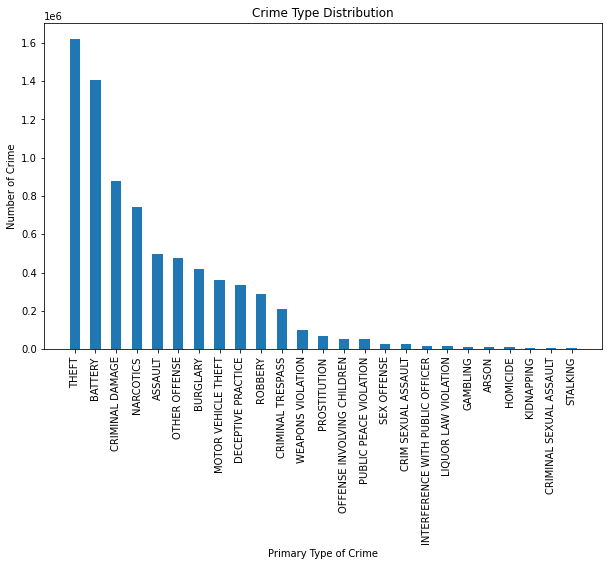

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(crime_vs_type["primary_type"], crime_vs_type["crime_count"], width=0.5)
plt.xticks(rotation='vertical')
plt.title("Crime Type Distribution")
plt.xlabel("Primary Type of Crime")
plt.ylabel("Number of Crime")

The above bar plot shows apparent differences between the number for different types of crime. For example, the bars for certain crime types, such as theft and battery, are much taller than the bars for other crimes, such as gambling and arson, which indicates a relationship between the type of crime and the number of crimes that occur. In particular, particular kinds of crime, such as theft and battery, are more likely to happen than other crimes. This suggests that the type of crime may be an essential factor to consider when predicting the number of crimes that will occur in a given area. Overall, the bar plot provides valuable insights into the relationship between crime type and crime count.

#### Crime Time

We will then examine whether the number of crimes is related to the time (both year, date, and hour in a day) at which they happened.

We will begin with analyzing the relation between year and the number of crime.

In [ ]:
%%bigquery crime_vs_year --project $project_id
SELECT
  COUNT(unique_key) AS crime_count,
  year
FROM
  `bigquery-public-data.chicago_crime.crime`
GROUP BY
  year
ORDER BY
  year ASC

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery avg_crime_year --project $project_id
WITH
  YEAR_COUNT AS (
  SELECT
    COUNT(unique_key) AS crime_count,
    year
  FROM
    `bigquery-public-data.chicago_crime.crime`
  GROUP BY
    year
  ORDER BY
    year ASC)
SELECT
  AVG(YEAR_COUNT.crime_count) AS avg_count
FROM
  YEAR_COUNT

Query is running:   0%|          |

Downloading:   0%|          |

Text(0, 0.5, 'Number of Crime')

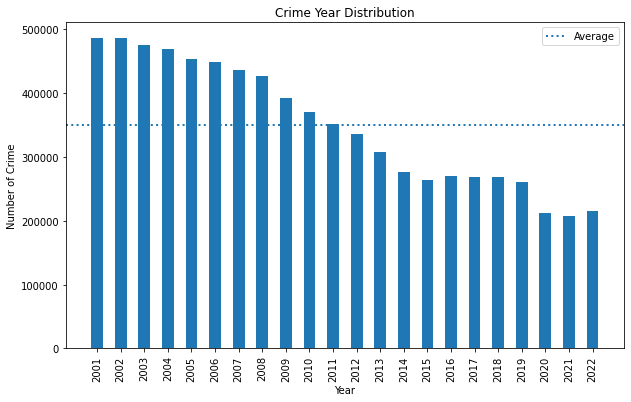

In [ ]:
plt.figure(figsize=(10,6))
x = crime_vs_year["year"]
x = [int(a) for a in x]
plt.bar(x, crime_vs_year["crime_count"], width=0.5)
plt.axhline(int(avg_crime_year["avg_count"]), ls='dotted', label = 'Average', linewidth=2)
plt.xticks(rotation='vertical')
plt.xticks(x)
plt.title("Crime Year Distribution")
plt.xlabel("Year")
plt.legend()
plt.ylabel("Number of Crime")

The above plot shows a general decreasing trend over the years for the number of criminal counts with an average of approximately 350,000 crimes per year. Hence, we hypothesize this with a somewhat negative relationship between the year and the number of crimes.

Next, we want to examine closely how the trend changes within a year by illustrating it with the crime data for each specific day and date.

In [ ]:
%%bigquery crime_time_mo --project $project_id
WITH DATE_COUNT AS(
SELECT
  COUNT(unique_key) AS crime_count,
  DATE(date) AS date_crime,
FROM
  `bigquery-public-data.chicago_crime.crime`
GROUP BY
  date_crime
ORDER BY
  date_crime)
SELECT DATE_COUNT.crime_count, DATE_COUNT.date_crime, EXTRACT(year FROM DATE_COUNT.date_crime) AS year FROM DATE_COUNT

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery avg_crime_time_mo --project $project_id
WITH DATE_COUNT AS (
SELECT
  COUNT(unique_key) AS crime_count,
  DATE(date) AS date_crime
FROM
  `bigquery-public-data.chicago_crime.crime`
GROUP BY
  date_crime
ORDER BY
  date_crime)
SELECT 
  AVG(DATE_COUNT.crime_count) AS avg_count
FROM
  DATE_COUNT

Query is running:   0%|          |

Downloading:   0%|          |

Text(0, 0.5, 'NUmber of Crime')

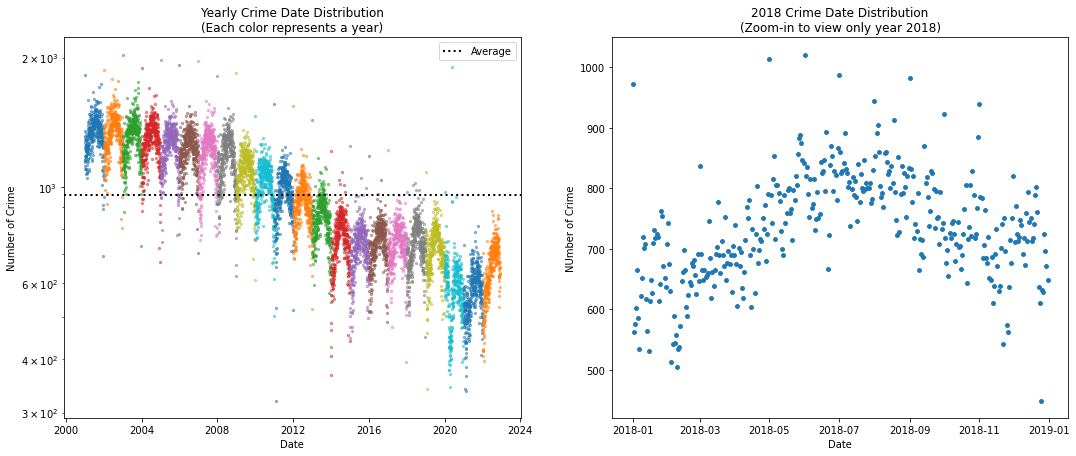

In [ ]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(18, 7))
# axs1.figure(figsize=(10,8))
for year in range(2001, 2023):
  crime_date_18 = crime_time_mo[crime_time_mo["year"] == year]
  axs1.scatter(crime_date_18["date_crime"], crime_date_18["crime_count"], s=5, alpha=0.5)
axs1.axhline(float(avg_crime_time_mo["avg_count"]), ls='dotted', label = 'Average', color='black', linewidth=2)
axs1.set_yscale('log')
axs1.legend()
axs1.set_title("Yearly Crime Date Distribution\n(Each color represents a year)")
axs1.set_xlabel("Date")
axs1.set_ylabel("Number of Crime")

crime_date_18 = crime_time_mo[crime_time_mo["year"] == 2018]
axs2.scatter(crime_date_18["date_crime"], crime_date_18["crime_count"], s=15)
axs2.set_title("2018 Crime Date Distribution\n(Zoom-in to view only year 2018)")
axs2.set_xlabel("Date")
axs2.set_ylabel("NUmber of Crime")

In the above plots, the scatter plot on the left-hand side, each color represents a year's scatter. It illustrates that although there is a general decreasing trend each year, within a year, the number of counts fluctuates in a parabola shape. The yearly-based date trend usually starts and ends with lower crime counts for January and December but climbs up in the middle of the year, like during July and August. We also can see approximately 950 crimes daily in average. After we zoom in on the plots on the right hand side with the distribution for only one year example - 2018, we can confirm the above analysis holds its grounds. It shows an increase from January to July/August and then a decrease afterward. Hence, more crimes usually happen around the middle of the year.

From the above results, we can see that the number of crimes has some relation with time. Nonetheless, it could give us more insights if we look at per-hour crime distribution fluctuation within a day to get more specific timings.

In [ ]:
%%bigquery try_time --project $project_id
SELECT
  COUNT(unique_key) AS crime_count,
  year,
  EXTRACT(hour FROM date) AS crime_hour
FROM
  `bigquery-public-data.chicago_crime.crime`
GROUP BY
  crime_hour, year
ORDER BY
  year, crime_hour

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery avg_crime_hour --project $project_id
WITH
  tot_crime_h_cnt AS (
  SELECT
    COUNT(unique_key) AS crime_count,
    EXTRACT(hour
    FROM
      date) AS crime_hour
  FROM
    `bigquery-public-data.chicago_crime.crime`
  GROUP BY
    crime_hour
  ORDER BY
    crime_hour)
SELECT
  tot_crime_h_cnt.crime_hour,
  AVG(tot_crime_h_cnt.crime_count) / (
  SELECT
    COUNT(*)
  FROM
    `bigquery-public-data.chicago_crime.crime`) AS avg_crime_count_pct
FROM
  tot_crime_h_cnt
GROUP BY
  tot_crime_h_cnt.crime_hour
ORDER BY
  tot_crime_h_cnt.crime_hour

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, 'Hour of a Day vs. Average Crime Count')

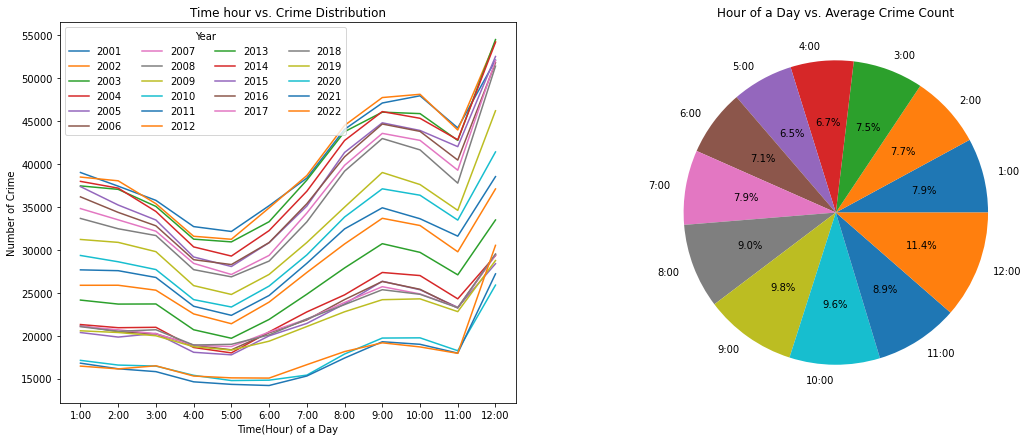

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
for cur_year in range(2001, 2023):
  crime_date_data = try_time[try_time["year"] == cur_year]
  x = [f'{a}:00' for a in crime_date_data['crime_hour']]
  y = [a for a in crime_date_data['crime_count']]
  # axs[0].set_xlim(left="0:00", right="13:00")
  axs[0].plot(x, y, label = f"{cur_year}")
axs[0].legend(title = "Year", loc='upper left', ncol=4)
# axs[0].set_xticks(x)
axs[0].set_title("Time hour vs. Crime Distribution")
axs[0].set_xlabel("Time(Hour) of a Day")
axs[0].set_ylabel("Number of Crime")

x = [f'{a}:00' for a in avg_crime_hour['crime_hour']]
y = [a for a in avg_crime_hour['avg_crime_count_pct']]
axs[1].pie(y, autopct='%1.1f%%', labels = x)
plt.title("Hour of a Day vs. Average Crime Count")

Although the pie chart shows that the number of crimes is divided somewhat evenly among the different hours of the day, there is still a slight difference in the crime count between each hour in time. This can be verified based on the line graph; it is clear that the crime count changes over time. The line rises and falls in a regular pattern for each year, indicating a relationship between hours in a day and the number of crimes that occur. We can see that there are times of day when the crime count is lower, such as during the 4:00-5:00 hours, and other times of day when the crime count is higher, such as in the hours of 10:00-12:00. This suggests that the time of day may be an important factor to consider when predicting the number of crimes that will occur in a given area. Overall, the line graph provides valuable insights into the relationship between time and crime count.

According to the plots and analyses presented above, the number of crimes is related to the time they occur. This relationship is evident in the data for the year, date, and hour of the day. For instance, the plots show that specific years, dates, or hours tend to have higher crime counts than others. Therefore, it seems reasonable to conclude that the time at which a crime occurs is related to the overall crime count. Based on this observation, we can hypothesize that we might find that in the future years, around 4:00 in the day in January, we will see a meager crime count.

### Location-based Crime Analysis

After analyzing the properties of crime, we are interested in exploring the relationship between crime and external factors. In particular, we will investigate the relationship between the traffic situation of locations of crimes via the number of taxi trips in that area. To do this, we will analyze data on the location or community area of crimes that have occurred and compare it to data on the number of taxi trips in the same location. It can allow us to determine if there is a correlation between the two and whether a high number of taxi trips in an area is associated with a higher or lower incidence of crime. Also, since the taxi table is really huge, we will only pick the data for 1 or 2 years to join the tables.

#### District Distance

Since the location is the feature we would like to examine, the district is one of the first to have a clear location-oriented message. Thus, this will be our first focus. We also connect the taxi and crime locations based on the engineered feature distance between the points, calculated from their latitude and longitude.

In [ ]:
%%bigquery crime_district_distance --project $project_id
WITH
  crimepoint AS (
  SELECT
    ST_GEOGPOINT(crime.longitude, crime.latitude) AS cpoint,
    district,
    unique_key AS ckey
  FROM
    `bigquery-public-data.chicago_crime.crime` crime
  WHERE
    year = 2021)
SELECT
  district,
  COUNT(tkey) AS frequency,
FROM
  crimepoint,
  (
  SELECT
    ST_GEOGPOINT(pickup_longitude, pickup_latitude) AS tpoint,
    unique_key AS tkey
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  WHERE
    trip_start_timestamp <= '2021-12-31'
    AND trip_start_timestamp >= '2021-01-01') AS taxipoint
WHERE
  ST_DISTANCE(cpoint, tpoint) < 100
GROUP BY
  district

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 0, 'District')

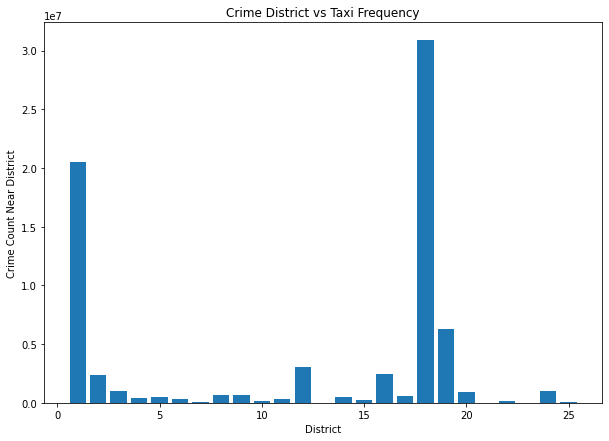

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(crime_district_distance['district'], crime_district_distance['frequency'])
plt.tick_params(axis='x',labelsize=10)
plt.title("Crime District vs Taxi Frequency")
plt.ylabel("Crime Count Near District")
plt.xlabel("District")

This is a hard-to-explain visualization, since we are expected to see more evenly distributed bars. The unexpected plot could happen because the size of district is different, district such as district 1 and 18 might take up much bigger spaces than other district, so it will have larger area to count the total crime numbers, so the crime counts is thickened.

The bar plot is highly concentrated in one or two bars, indicating that the feature district where the crimes happened might not be a reliable predictor of the feature on the crime counts. This infers that the data distribution is skewed and a lack of diversity in the values for district. As a result, using it as a predictor may not provide accurate or useful predictions of the crime count. It may be more effective to use other features or incorporate additional data to improve the model's predictive power. Hence, we found a better-divided feature in size: the community area. Chicago divides its community area evenly in size and is distributed across the city in a well-organized manner.

#### Community Area

Following along from above statements, we begin our community area related analysis.

In [ ]:
%%bigquery taxi_frequency --project $project_id

SELECT
  community_area,
  COUNT(unique_key) AS frequency
FROM
  `bigquery-public-data.chicago_crime.crime` crime
WHERE
  community_area IS NOT NULL
GROUP BY
  community_area

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 0, 'Community Area')

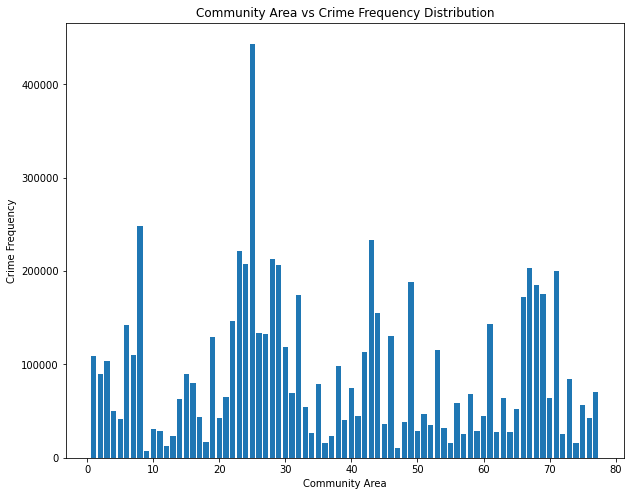

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(taxi_frequency['community_area'], taxi_frequency['frequency'])
plt.tick_params(axis='x',labelsize=10)
plt.title("Community Area vs Crime Frequency Distribution")
plt.ylabel("Crime Frequency")
plt.xlabel("Community Area")

The bar chart shows fluctuation, indicating that the values on the community area and crime count are related, but there is no specific trend. The bars rise and fall randomly, without any apparent pattern or direction. It suggests that the relationship between the community area and crime count is somewhat inconsistent and may be influenced by other factors. Prevailing, the bar chart shows a correlation between the community areas and crime counts, but it needs to be clarified and predictable.

Hence, we added a new feature from the locations of taxi trips to see if the "crowdedness" or busyness in traffic in the community areas can be the other feature to make consistent connections.

In [ ]:
%%bigquery pick_up_frequency --project $project_id
SELECT
  pickup_community_area,COUNT(unique_key) AS frequency 
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE
  pickup_community_area IS NOT NULL
GROUP BY
  pickup_community_area

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery drop_off_frequency --project $project_id
SELECT DISTINCT
  dropoff_community_area,COUNT(unique_key) AS frequency 
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE
  dropoff_community_area IS NOT NULL
GROUP BY
  dropoff_community_area

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 0, 'Dropoff community area')

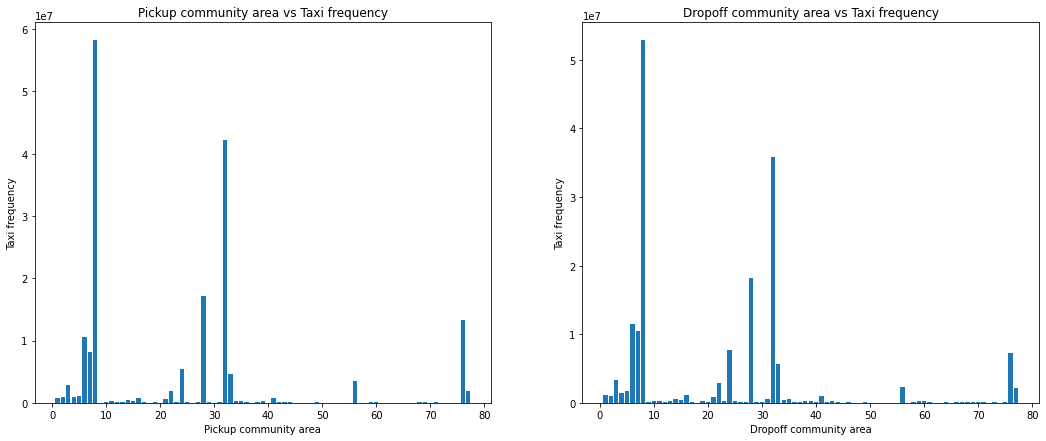

In [ ]:
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
plt.bar(pick_up_frequency['pickup_community_area'], pick_up_frequency['frequency'])
plt.tick_params(axis='x',labelsize=10)
plt.title("Pickup community area vs Taxi frequency")
plt.ylabel("Taxi frequency")
plt.xlabel("Pickup community area")
plt.subplot(1, 2, 2)
plt.bar(drop_off_frequency['dropoff_community_area'], drop_off_frequency['frequency'])
plt.tick_params(axis='x',labelsize=10)
plt.title("Dropoff community area vs Taxi frequency")
plt.ylabel("Taxi frequency")
plt.xlabel("Dropoff community area")

We can see that the peaks and troughs of taxi trips per community area and the peaks of crime counts per community area have closer trends and relations. For example, they both peaked at around 10s, 30s, and 70s community areas, so the traffic situation of the taxi can also be a factor that influences the crime count. The above indicates that the taxi traffic situation can contribute to the crime count in a given area. Therefore, we will join the two tables via the community area column next to see a better-illustrated effect and a more comprehensive understanding.

#### Map Visualization

To find the relationship between taxi trips and crime counts, as we analyzed the reasoning above, we need to join the table and select a way to demonstrate the idea better. Since both taxi trips and Chicago crimes have their geographical attributes, such as the location of where the event is happening, we propose a map visualization of the area in which these events took place and analyze if there are relations between the geographical information of the taxi trips and crimes.

In [ ]:
%%bigquery crime_taxi_loc --project $project_id
WITH
  TAXI_DATA AS (
  SELECT
    unique_key,
    pickup_community_area,
    pickup_latitude,
    pickup_longitude,
    dropoff_community_area,
    dropoff_latitude,
    dropoff_longitude
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  WHERE
    trip_start_timestamp <= '2018-12-31'
    AND trip_start_timestamp >= '2018-01-01'
    AND pickup_community_area IS NOT NULL
    AND dropoff_community_area IS NOT NULL
    AND pickup_latitude IS NOT NULL
    AND pickup_longitude IS NOT NULL
    AND dropoff_latitude IS NOT NULL
    AND dropoff_longitude IS NOT NULL),
  PICKUP_ROWS AS (
  SELECT
    *,
    ROW_NUMBER() OVER(PARTITION BY pickup_community_area) AS row_number,
    COUNT(unique_key) OVER(PARTITION BY pickup_community_area) AS p_loc_count
  FROM
    TAXI_DATA ),
  PICKUP_ROW AS (
  SELECT
    pickup_community_area,
    pickup_latitude,
    pickup_longitude,
    p_loc_count
  FROM
    PICKUP_ROWS
  WHERE
    row_number = 1),
  DROPOFF_ROWS AS (
  SELECT
    *,
    ROW_NUMBER() OVER(PARTITION BY dropoff_community_area) AS row_number,
    COUNT(unique_key) OVER(PARTITION BY dropoff_community_area) AS d_loc_count
  FROM
    TAXI_DATA ),
  DROPOFF_ROW AS (
  SELECT
    dropoff_community_area,
    dropoff_latitude,
    dropoff_longitude,
    d_loc_count
  FROM
    DROPOFF_ROWS
  WHERE
    row_number = 1),
  CRIME_ROWS AS (
  SELECT
    *,
    ROW_NUMBER() OVER(PARTITION BY community_area) AS row_number,
    COUNT(unique_key) OVER(PARTITION BY community_area) AS loc_count
  FROM
    `bigquery-public-data.chicago_crime.crime`
  WHERE
    community_area IS NOT NULL
    AND latitude IS NOT NULL
    AND longitude IS NOT NULL),
  CRIME_ROW AS (
  SELECT
    community_area,
    latitude,
    longitude,
    loc_count
  FROM
    CRIME_ROWS
  WHERE
    row_number = 1),
  TAXI_COUNT AS (
  SELECT
    community_area,
    latitude,
    longitude,
    loc_count,
    pickup_latitude,
    pickup_longitude,
    p_loc_count,
    dropoff_latitude,
    dropoff_longitude,
    d_loc_count
  FROM
    CRIME_ROW
  JOIN
    PICKUP_ROW
  ON
    PICKUP_ROW.pickup_community_area = CRIME_ROW.community_area
  JOIN
    DROPOFF_ROW
  ON
    DROPOFF_ROW.dropoff_community_area = CRIME_ROW.community_area)
SELECT
  community_area,
  latitude,
  longitude,
  23*loc_count/(
  SELECT
    MAX(TAXI_COUNT.loc_count)
  FROM
    TAXI_COUNT) AS loc_size,
  pickup_latitude,
  pickup_longitude,
  23*p_loc_count/(
  SELECT
    MAX(TAXI_COUNT.p_loc_count)
  FROM
    TAXI_COUNT) AS p_loc_size,
  dropoff_latitude,
  dropoff_longitude,
  23*d_loc_count/(
  SELECT
    MAX(TAXI_COUNT.d_loc_count)
  FROM
    TAXI_COUNT) AS d_loc_size,
FROM
  TAXI_COUNT

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
f = folium.Figure(width=500, height=600)
chicago_taxi_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=10, min_zoom =9, max_zoom =10, tiles ='Stamen Terrain').add_to(f)

In [ ]:
for i in range(len(crime_taxi_loc)):
    lat = crime_taxi_loc.iloc[i][1]
    long = crime_taxi_loc.iloc[i][2]
    folium.CircleMarker(location = [lat, long], fill = True, radius=crime_taxi_loc.iloc[i][3], color='red').add_to(chicago_taxi_map)
for i in range(len(crime_taxi_loc)):
    lat = crime_taxi_loc.iloc[i][4]
    long = crime_taxi_loc.iloc[i][5]
    folium.CircleMarker(location = [lat, long], fill = True, radius=crime_taxi_loc.iloc[i][6]).add_to(chicago_taxi_map)
for i in range(len(crime_taxi_loc)):
    lat = crime_taxi_loc.iloc[i][7]
    long = crime_taxi_loc.iloc[i][8]
    folium.CircleMarker(location = [lat, long], fill = True, radius=crime_taxi_loc.iloc[i][9], color='green').add_to(chicago_taxi_map)

In [ ]:
# Please use Google Colab to see the visualized Map result
print(" Map Visualization of Chicago Crime and Taxi Trip Counts")
f

 Map Visualization of Chicago Crime and Taxi Trip Counts


The above graph shows the number of crimes per community location in red circles. The larger the radius size, the more crimes happen in the area. The blue/green circles represent the number of taxi trips per pickup/dropoff community location. The larger the radius size, the more taxi trips happen in the area, which also infers the crowd situation.
From the graph, we can see that there were more taxi trips going in the center area where downtown Chicago is located, and more crimes happened around those areas. We can make a hypothesis that the crimes will likely happen near the busier area but not right in the middle of the bustling. This hypothesis bottom from the observation that there are more taxi trips in the city's center, and more crimes happen in the areas surrounding this central region. The high concentration of taxi traffic in the city's center may create a protective effect, preventing crime from occurring directly in the busiest areas. Instead, the crimes may be displaced to the surrounding areas, where the density of taxi traffic is lower. Further prediction later will be necessary to test this hypothesis and determine its validity.

### City-based Crime Analysis

It also makes intuitive sense that different cities will have different crime counts based on their regulations, culture, or even populations. We compare the crime rate and count of different metropolises in different countries. 

In [ ]:
%%bigquery austin_crime_year --project $project_id
SELECT
  COUNT(unique_key) AS crime_count,
  year
FROM
  `bigquery-public-data.austin_crime.crime`
GROUP BY
  year
ORDER BY
  year ASC

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery austin_avg_crime_year --project $project_id
WITH
  YEAR_COUNT AS (
    SELECT
  COUNT(unique_key) AS crime_count,
  year
FROM
  `bigquery-public-data.austin_crime.crime`
GROUP BY
  year
ORDER BY
  year ASC)
SELECT
  AVG(YEAR_COUNT.crime_count) AS avg_count
FROM
  YEAR_COUNT

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery london_crime_year --project $project_id
SELECT
  SUM(value) AS crime_count,
  year
FROM
  `bigquery-public-data.london_crime.crime_by_lsoa`
GROUP BY
  year
ORDER BY
  year ASC

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery london_avg_crime_year --project $project_id
WITH
  YEAR_COUNT AS (
  SELECT
  SUM(value) AS crime_count,
  year
FROM
  `bigquery-public-data.london_crime.crime_by_lsoa`
GROUP BY
  year
ORDER BY
  year ASC)
SELECT
  AVG(YEAR_COUNT.crime_count) AS avg_count
FROM
  YEAR_COUNT

Query is running:   0%|          |

Downloading:   0%|          |

Text(0, 0.5, 'Number of Crime')

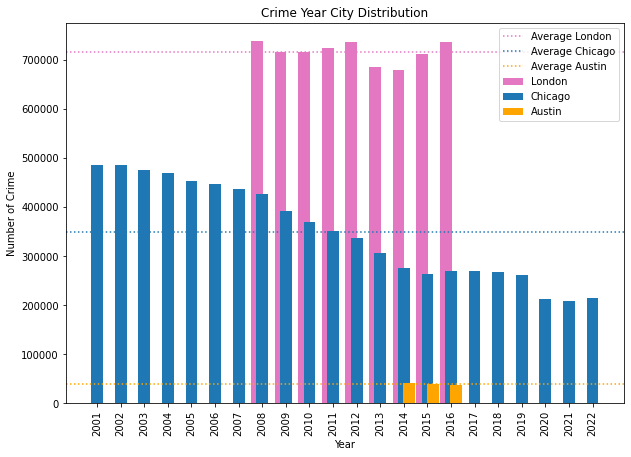

In [ ]:
plt.figure(figsize=(10,7))
width = 0.45
x0 = [int(a) for a in crime_vs_year["year"]]
x_lon = [int(a) - width/2 for a in london_crime_year["year"]]
x_aus = [int(a) + width/2 for a in austin_crime_year["year"]]

plt.bar(x_lon, london_crime_year["crime_count"], width=0.5, color = '#e377c2', label = 'London')
plt.bar(x0, crime_vs_year["crime_count"], width=0.5, label = 'Chicago')
plt.bar(x_aus, austin_crime_year["crime_count"], width=0.5, color = 'orange', label = 'Austin')

plt.axhline(int(london_avg_crime_year["avg_count"]), color = '#e377c2', ls='dotted', label = 'Average London')
plt.axhline(int(avg_crime_year["avg_count"]), ls='dotted', label = 'Average Chicago')
plt.axhline(int(austin_avg_crime_year["avg_count"]), color = 'orange', ls='dotted', label = 'Average Austin')

plt.xticks(rotation='vertical')
plt.xticks(x0)
plt.title("Crime Year City Distribution")
plt.xlabel("Year")
plt.legend()
plt.ylabel("Number of Crime")

The bar plot implies a relationship between the number of crimes and the city where they occur. This is not surprising, as each city has its own unique regulations and culture that can impact the level of crime occurrence. Therefore, the crime situation in Chicago would be different from that of other cities. In general, this plot shows that the city where a crime occurs is related in determining the number of crimes committed. For example, the city of Chicago is known for its high crime rate, which can be attributed to its size, population density, and socioeconomic conditions. Hence, we will analyze these socioeconomic and population composition properties in the following census analysis.

### Census-based Crime Analysis

We will start by performing analysis on demographic information, which are from the U.S. Census Dataset, we will also only picked subtables for 2 years due to the large size of the dataset.

#### Unnormalized Analysis

In [ ]:
%%bigquery census_income_11 --project $project_id
WITH
  subtable AS (
  SELECT
    pickup_community_area,
    pickup_census_tract,
    COUNT(crime.unique_key) AS numberofcrime
  FROM (
    SELECT
      DISTINCT pickup_community_area,
      pickup_census_tract
    FROM
      `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
    `bigquery-public-data.chicago_crime.crime` crime
  WHERE
    t.pickup_community_area = crime.community_area
    AND year = 2011
  GROUP BY
    pickup_community_area,
    pickup_census_tract )
SELECT
  geo_id,
  income_per_capita,
  numberofcrime
FROM
  `bigquery-public-data.census_bureau_acs.censustract_2011_5yr`,
  subtable
WHERE
  CAST(geo_id AS int) = CAST(pickup_census_tract AS int)

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery census_income_15 --project $project_id
WITH
  subtable AS (
  SELECT
    pickup_community_area,
    pickup_census_tract,
    COUNT(crime.unique_key) AS numberofcrime
  FROM (
    SELECT
      DISTINCT pickup_community_area,
      pickup_census_tract
    FROM
      `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
    `bigquery-public-data.chicago_crime.crime` crime
  WHERE
    t.pickup_community_area = crime.community_area
    AND year = 2015
  GROUP BY
    pickup_community_area,
    pickup_census_tract )
SELECT
  geo_id,
  income_per_capita,
  numberofcrime
FROM
  `bigquery-public-data.census_bureau_acs.censustract_2015_5yr`,
  subtable
WHERE
  CAST(geo_id AS int) = CAST(pickup_census_tract AS int)

Query is running:   0%|          |

Downloading:   0%|          |

Text(0, 0.5, 'number of crime')

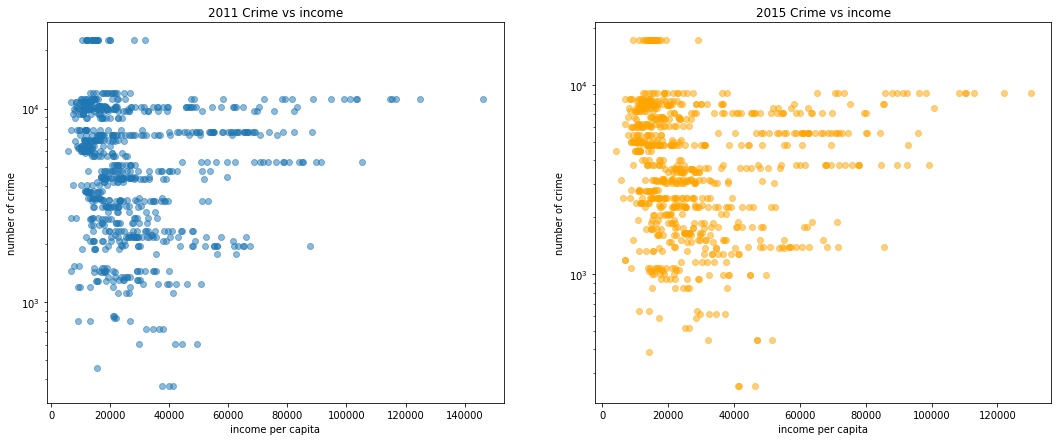

In [ ]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(18, 7))
axs1.scatter(census_income_11['income_per_capita'],census_income_11['numberofcrime'],alpha=0.5)
axs2.scatter(census_income_15['income_per_capita'],census_income_15['numberofcrime'],alpha=0.5,color='orange')
axs1.set_title("2011 Crime vs income")
axs1.set_yscale('log')
axs1.set_xlabel("income per capita")
axs1.set_ylabel("number of crime")
axs2.set_title("2015 Crime vs income")
axs2.set_yscale('log')
axs2.set_xlabel("income per capita")
axs2.set_ylabel("number of crime")

We can see a trend that the number of crimes in census tracts decrease with the increment of income per capita. However, there is an issue that they don't account for the population of each county. This is because population of different census tract vary greatly.Therefore, we need to normalize the crimes by population, so we can have a better understanding of how the crimes are affected by the income per capita in a census tract. The rest of the analysis we do will be normalized by population of census tract.

#### Normalized Analysis


Crime rate is the number of crimes in an area to the population of that area. Since crime rate is not directly given in the table, we will calculated as a engineered feature, in our analysis, the crime rate is calculated as number of crimes in a census tract / population of a census tract.

In the following part, we will explore the relationship between crime rate and income per capita, percentage of white population and house vacancy rate.

Firstly, we hypothesize that the crime rate decreases with the increment of income. To plot the relationship, we choose the data of 2011 and 2015 to compare.

In [ ]:
%%bigquery census_n_income_15 --project $project_id
WITH
  subtable AS (
  SELECT
    pickup_community_area,
    pickup_census_tract,
    COUNT(crime.unique_key) AS numberofcrime
  FROM (
    SELECT
      DISTINCT pickup_community_area,
      pickup_census_tract
    FROM
      `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
    `bigquery-public-data.chicago_crime.crime` crime
  WHERE
    t.pickup_community_area = crime.community_area
    AND year = 2015
  GROUP BY
    pickup_community_area,
    pickup_census_tract )
SELECT
  geo_id,
  income_per_capita,
  numberofcrime/(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS crimerate
FROM
  `bigquery-public-data.census_bureau_acs.censustract_2015_5yr`,
  subtable
WHERE
  CAST(geo_id AS int) = CAST(pickup_census_tract AS int)
  AND amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop <> 0

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery census_n_income_11 --project $project_id
WITH
  subtable AS (
  SELECT
    pickup_community_area,
    pickup_census_tract,
    COUNT(crime.unique_key) AS numberofcrime
  FROM (
    SELECT
      DISTINCT pickup_community_area,
      pickup_census_tract
    FROM
      `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
    `bigquery-public-data.chicago_crime.crime` crime
  WHERE
    t.pickup_community_area = crime.community_area
    AND year = 2011
  GROUP BY
    pickup_community_area,
    pickup_census_tract )
SELECT
  geo_id,
  income_per_capita,
  numberofcrime/(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS crimerate
FROM
  `bigquery-public-data.census_bureau_acs.censustract_2011_5yr`,
  subtable
WHERE
  CAST(geo_id AS int) = CAST(pickup_census_tract AS int)
  AND amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop <> 0

Query is running:   0%|          |

Downloading:   0%|          |

Text(0, 0.5, 'crime rate')

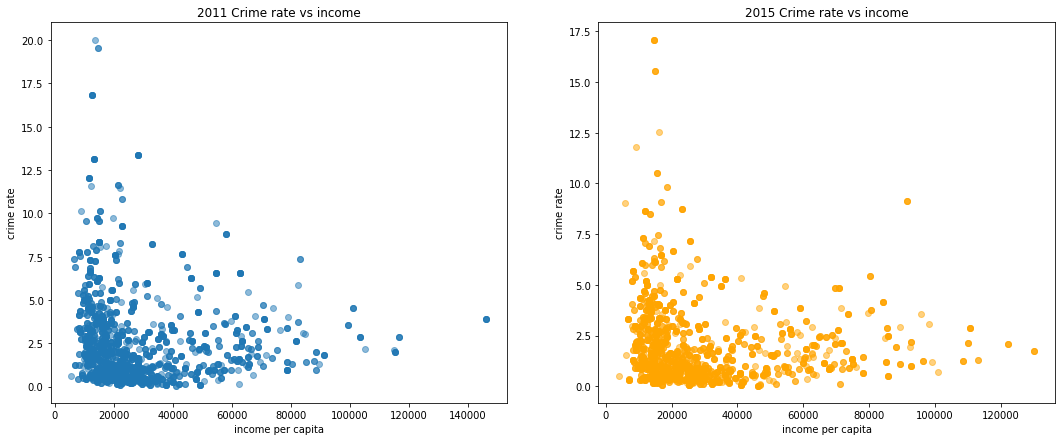

In [ ]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(18, 7))
census_n_income_11_sample=census_n_income_11.sample(n=2000, random_state=40,replace=True)
axs1.scatter(census_n_income_11_sample['income_per_capita'],census_n_income_11_sample['crimerate'],alpha=0.5)
axs1.set_title("2011 Crime rate vs income")
axs1.set_xlabel("income per capita")
axs1.set_ylabel("crime rate")

census_n_income_15_sample=census_n_income_15.sample(n=2000, random_state=40,replace=True)
axs2.scatter(census_n_income_15_sample['income_per_capita'],census_n_income_15_sample['crimerate'],alpha=0.5,color='orange')
axs2.set_title("2015 Crime rate vs income")
axs2.set_xlabel("income per capita")
axs2.set_ylabel("crime rate")

We choose the data of 2011 and 2015. The above two plots show how the income per capita affects crime rates. The Y-Axis is normalized by population,so the results are much easier to visualize. 

We can see that with the decrement of income, maximum crime rate increases sharply, from 3.0 to 20.0. We also find that the crime rate of census tracts with similar income per capita could fluctuate greatly, ranging from almost 0 to 20.0. 

Apart from economic condition, we want to explore more. We think that the composition of a census tract's population may affect its crime rate. This is also a designed feature that is not directly given from the table, where we calculate the percentage of white population takes up the whole population. Here is the visualization of percentage of white population versus crime rate.

In [ ]:
%%bigquery census_pop_11 --project $project_id
WITH
  subtable AS (
  SELECT
    pickup_community_area,
    pickup_census_tract,
    COUNT(crime.unique_key) AS numberofcrime
  FROM (
    SELECT
      DISTINCT pickup_community_area,
      pickup_census_tract
    FROM
      `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
    `bigquery-public-data.chicago_crime.crime` crime
  WHERE
    t.pickup_community_area = crime.community_area
    AND year = 2011
  GROUP BY
    pickup_community_area,
    pickup_census_tract )
SELECT
  geo_id,
  white_pop /(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS percent_white,
  numberofcrime/(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS crimerate
FROM
  `bigquery-public-data.census_bureau_acs.censustract_2011_5yr`,
  subtable
WHERE
  CAST(geo_id AS int) = CAST(pickup_census_tract AS int)
  AND amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop <> 0

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery census_pop_15 --project $project_id
WITH
  subtable AS (
  SELECT
    pickup_community_area,
    pickup_census_tract,
    COUNT(crime.unique_key) AS numberofcrime
  FROM (
    SELECT
      DISTINCT pickup_community_area,
      pickup_census_tract
    FROM
      `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
    `bigquery-public-data.chicago_crime.crime` crime
  WHERE
    t.pickup_community_area = crime.community_area
    AND year = 2015
  GROUP BY
    pickup_community_area,
    pickup_census_tract )
SELECT
  geo_id,
  white_pop /(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS percent_white,
  numberofcrime/(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS crimerate
FROM
  `bigquery-public-data.census_bureau_acs.censustract_2015_5yr`,
  subtable
WHERE
  CAST(geo_id AS int) = CAST(pickup_census_tract AS int)
  AND amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop <> 0

Query is running:   0%|          |

Downloading:   0%|          |

Text(0, 0.5, 'crime rate')

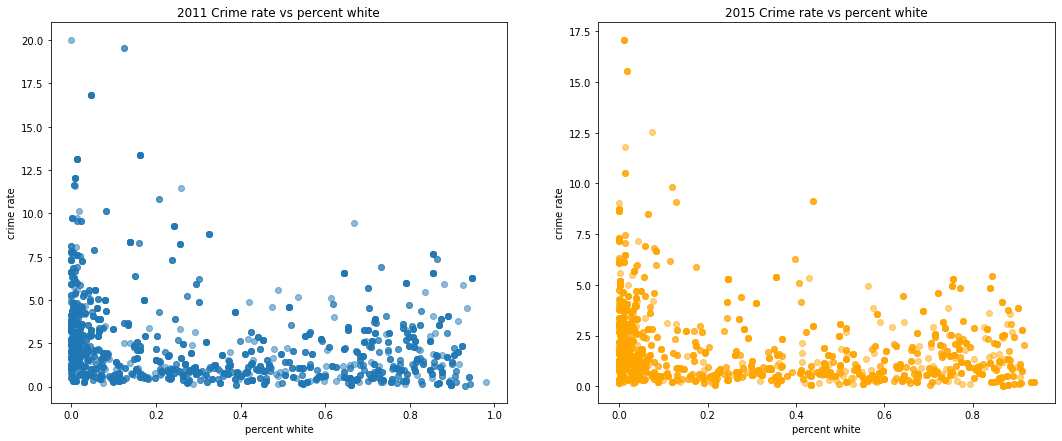

In [ ]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(18, 7))
census_pop_11_sample=census_pop_11.sample(n=2000, random_state=40, replace=True)
axs1.scatter(census_pop_11_sample['percent_white'],census_pop_11_sample['crimerate'],alpha=0.5)
census_pop_15_sample=census_pop_15.sample(n=2000, random_state=40, replace=True)
axs2.scatter(census_pop_15_sample['percent_white'],census_pop_15_sample['crimerate'],alpha=0.5, color='orange')
axs1.set_title("2011 Crime rate vs percent white")
axs1.set_xlabel("percent white")
axs1.set_ylabel("crime rate")
axs2.set_title("2015 Crime rate vs percent white")
axs2.set_xlabel("percent white")
axs2.set_ylabel("crime rate")

From the above plots, we can see that the composition of population vary when the crime rate is under 2.5, ranging from 0 to almost 1.0. However, when it comes to higher crime rate, which is more than 7.5, almost all the percentage of white population of the census tracts is less than 0.3. We can conclude that there is a correlation between percentage of white population and crime rate.

The last factor, that might be in relation to crime rate, we intend to explore is the house vacancy rate. We calculate it as vacant_housing_units / (occupied_housing_units+vacant_housing_units). 

In [ ]:
%%bigquery census_vac_11 --project $project_id
WITH
  subtable AS (
  SELECT
    pickup_community_area,
    pickup_census_tract,
    COUNT(crime.unique_key) AS numberofcrime
  FROM (
    SELECT
      DISTINCT pickup_community_area,
      pickup_census_tract
    FROM
      `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
    `bigquery-public-data.chicago_crime.crime` crime
  WHERE
    t.pickup_community_area = crime.community_area
    AND year = 2011
  GROUP BY
    pickup_community_area,
    pickup_census_tract )
SELECT
  geo_id,
  vacant_housing_units/(occupied_housing_units+vacant_housing_units) AS vacant,
  numberofcrime/(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS crimerate
FROM
  `bigquery-public-data.census_bureau_acs.censustract_2011_5yr`,
  subtable
WHERE
  CAST(geo_id AS int) = CAST(pickup_census_tract AS int)
  AND amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop <> 0

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery census_vac_15 --project $project_id
WITH
  subtable AS (
  SELECT
    pickup_community_area,
    pickup_census_tract,
    COUNT(crime.unique_key) AS numberofcrime
  FROM (
    SELECT
      DISTINCT pickup_community_area,
      pickup_census_tract
    FROM
      `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
    `bigquery-public-data.chicago_crime.crime` crime
  WHERE
    t.pickup_community_area = crime.community_area
    AND year = 2015
  GROUP BY
    pickup_community_area,
    pickup_census_tract )
SELECT
  geo_id,
  vacant_housing_units/(occupied_housing_units+vacant_housing_units) AS vacant,
  numberofcrime/(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS crimerate
FROM
  `bigquery-public-data.census_bureau_acs.censustract_2015_5yr`,
  subtable
WHERE
  CAST(geo_id AS int) = CAST(pickup_census_tract AS int)
  AND amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop <> 0

Query is running:   0%|          |

Downloading:   0%|          |

Text(0, 0.5, 'crime rate')

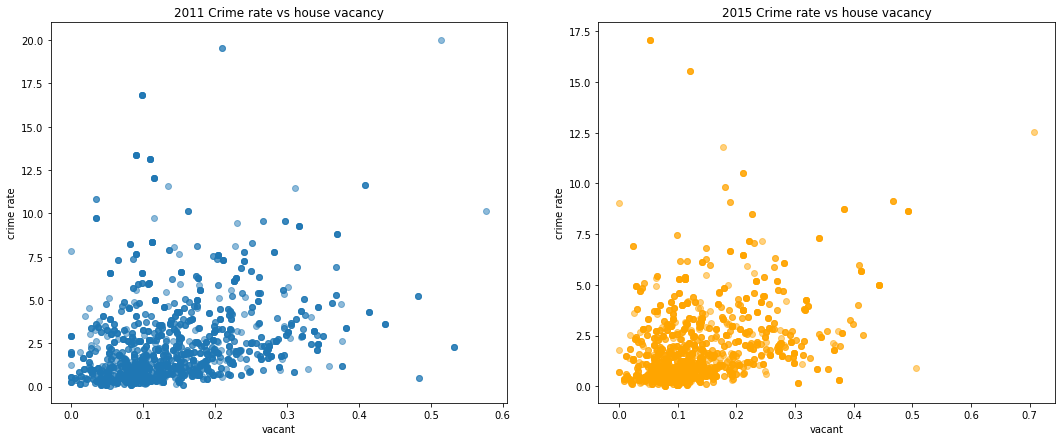

In [ ]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(18, 7))
census_vac_11_sample=census_vac_11.sample(n=2000, random_state=40,replace=True)
axs1.scatter(census_vac_11_sample['vacant'],census_vac_11_sample['crimerate'],alpha=0.5)
axs1.set_title("2011 Crime rate vs house vacancy")
axs1.set_xlabel("vacant")
axs1.set_ylabel("crime rate")

census_vac_15_sample=census_vac_15.sample(n=2000, random_state=40,replace=True)
axs2.scatter(census_vac_15_sample['vacant'],census_vac_15_sample['crimerate'],alpha=0.5,color='orange')
axs2.set_title("2015 Crime rate vs house vacancy")
axs2.set_xlabel("vacant")
axs2.set_ylabel("crime rate")

As the plots show, more than half of the census tracts' house vacancy rates are less than 0.2 and crime rates are less than 2.5. This indicates that crime happens less when most of the houses are occupied. This makes sense because with a large amount of population, crimers have no place to commit crimes or escaping. On the other hand, when more than 30% of the houses are vacant in a census tract, the crime rate are relatively higher. This makes sense because vacant houses provide cover for activities such as vandalism and drug dealing, and create a sense of insecurity in a community.

## Data Prediction

We firstly create a dataset `bqml_chicagotry` to store our model:


In [ ]:
# Only need to do this once
# model_dataset_name = 'bqml_chicagotry'

# dataset = bigquery.Dataset(client.dataset(model_dataset_name))
# dataset.location = 'US'
# client.create_dataset(dataset)

### Crime Prediction from Census (Logistic Regression)

#### Problem Definition and Setup

We would like to predict whether an area will be a “low crime risk” area given the attribute we analyzed above. We will define a “low crime risk” area as a community with less than the average crime rate. The census analysis above shows that the percentage of income per capita, white population proportion, and vacant house proportion should have some relationship with the crime rate. Hence, we will use those three attributes as the features to train the model logistic regression model and low crime risk(labeled as 1) and high crime risk(labeled as 0) as our labels. Also, the East Garfield Park community area in Chicago has long-standing issues with violent crime and property crime, so we would like to use East Garfield Park area for our prediction(so we will exclude it from training).

**Data Split:**  We split our data in the following way:

1. **Training set**: we'll train on areas of geo_id with the third last digit not equal to 1 or 2, with duration community area except East Garfield Park(27)
2. **Evaluation set**: we'll evaluate on areas of geo_id with the third last digit as 1, with community area except East Garfield Park (27)
3. **Test set**: we'll test on areas of geo_id with the third last digit as 1, with community area except East Garfield Park(27)
  
Note that for all these datasets, we'll filter out rides with community area being 27.

In [ ]:
%%bigquery --project $project_id
WITH
  subtable AS (
  SELECT
    pickup_community_area,
    pickup_census_tract,
    COUNT(crime.unique_key) AS crime_count
  FROM (
    SELECT
      DISTINCT pickup_community_area,
      pickup_census_tract
    FROM
      `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
    `bigquery-public-data.chicago_crime.crime` crime
  WHERE
    t.pickup_community_area = crime.community_area
    AND year = 2015
  GROUP BY
    pickup_community_area,
    pickup_census_tract )
SELECT
  AVG(crime_count/(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop)) AS label
FROM
  `bigquery-public-data.census_bureau_acs.censustract_2015_5yr`,
  subtable
WHERE
  CAST(geo_id AS int64) = CAST(pickup_census_tract AS int64)
  AND amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop <> 0

Query is running:   0%|          |

Downloading:   0%|          |

,label
0,1.861175


The above code shows that the average crime rate per community area is 1.86, so we will use this value as the risk threshold.

#### Training

In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE MODEL
  `bqml_chicagotry.crime_census_model_2`
  OPTIONS (model_type='logistic_reg') AS
WITH
  subtable AS (
  SELECT
    pickup_community_area,
    pickup_census_tract,
    COUNT(crime.unique_key) AS crime_count
  FROM (
    SELECT
      DISTINCT pickup_community_area,
      pickup_census_tract
    FROM
      `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
    `bigquery-public-data.chicago_crime.crime` crime
  WHERE
    t.pickup_community_area = crime.community_area
    AND year = 2015
  GROUP BY
    pickup_community_area,
    pickup_census_tract )
SELECT
  income_per_capita AS income_per_capita,
  white_pop /(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS white_pop_pct,
  vacant_housing_units/(occupied_housing_units+vacant_housing_units) AS vacant_pct,
  (CASE
      WHEN crime_count/(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) < 1.86 THEN 1
    ELSE
    0
  END
    ) AS label
FROM
  `bigquery-public-data.census_bureau_acs.censustract_2015_5yr`,
  subtable
WHERE
  CAST(geo_id AS int64) = CAST(pickup_census_tract AS int64)
  AND amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop <> 0
  AND geo_id NOT LIKE "%1__"
  AND geo_id NOT LIKE "%2__"
  AND pickup_community_area <> 27

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id
# Run cell to view training stats
SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `bqml_chicagotry.crime_census_model_1`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,6,0.210980,0.284787,12.8,2723
1,0,5,0.222977,0.287612,6.4,2739
2,0,4,0.265378,0.314157,3.2,3002
3,0,3,0.360768,0.392126,1.6,2643
4,0,2,0.483913,0.501494,0.8,2674
5,0,1,0.587357,0.595761,0.4,2831
6,0,0,0.654731,0.657703,0.2,2780


The model we picked has a decreasing and low loss after the 6th iteration, so it looks reasonable to proceed to the next step of evaluating the model with our evaluation and test set.

#### Evaluation on Evaluation Set

Since the training process converge and gave us back a descent loss result, we will evaluate our model on the evalutaion set.

In [ ]:
%%bigquery --project $project_id
SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_chicagotry.crime_census_model_2`,
    (
    WITH
      subtable AS (
      SELECT
        pickup_community_area,
        pickup_census_tract,
        COUNT(crime.unique_key) AS crime_count
      FROM (
        SELECT
          DISTINCT pickup_community_area,
          pickup_census_tract
        FROM
          `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
        `bigquery-public-data.chicago_crime.crime` crime
      WHERE
        t.pickup_community_area = crime.community_area
        AND year = 2015
      GROUP BY
        pickup_community_area,
        pickup_census_tract )
    SELECT
      income_per_capita AS income_per_capita,
      white_pop /(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS white_pop_pct,
      vacant_housing_units/(occupied_housing_units+vacant_housing_units) AS vacant_pct,
      (CASE
          WHEN crime_count/(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) < 1.86 THEN 1
        ELSE
        0
      END
        ) AS label
    FROM
      `bigquery-public-data.census_bureau_acs.censustract_2015_5yr`,
      subtable
    WHERE
      CAST(geo_id AS int64) = CAST(pickup_census_tract AS int64)
      AND amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop <> 0
      AND geo_id LIKE "%1__" AND pickup_community_area <> 27))

Query is running:   0%|          |

Downloading:   0%|          |

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.809524,0.871795,0.757009,0.839506,0.553917,0.718466


#### Evaluation on Test Set

Next, we will evaluate our model on the evalutaion set.

In [ ]:
%%bigquery --project $project_id
SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_chicagotry.crime_census_model_2`,
    (
    WITH
      subtable AS (
      SELECT
        pickup_community_area,
        pickup_census_tract,
        COUNT(crime.unique_key) AS crime_count
      FROM (
        SELECT
          DISTINCT pickup_community_area,
          pickup_census_tract
        FROM
          `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
        `bigquery-public-data.chicago_crime.crime` crime
      WHERE
        t.pickup_community_area = crime.community_area
        AND year = 2015
      GROUP BY
        pickup_community_area,
        pickup_census_tract )
    SELECT
      income_per_capita AS income_per_capita,
      white_pop /(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS white_pop_pct,
      vacant_housing_units/(occupied_housing_units+vacant_housing_units) AS vacant_pct,
      (CASE
          WHEN crime_count/(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) < 1.86 THEN 1
        ELSE
        0
      END
        ) AS label
    FROM
      `bigquery-public-data.census_bureau_acs.censustract_2015_5yr`,
      subtable
    WHERE
      CAST(geo_id AS int64) = CAST(pickup_census_tract AS int64)
      AND amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop <> 0
      AND geo_id LIKE "%2__" AND pickup_community_area <> 27))

Query is running:   0%|          |

Downloading:   0%|          |

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.740741,0.882353,0.715686,0.805369,0.583765,0.700525


From the above evaluation metric results on the evaluation and test sets, we could see a close to 1 precision, recall, accuracy, and f1 score, but not strictly at 1, which means our model is well-defined and can classify most of the cases, although not with 100% certainty. Also, to note that the ROC AUC results are also reasonablely good. However, we also always see precision greater than recall since precision is calculated as "the ratio between the number of samples labeled as 1 correctly classified to the total number of samples classified as 1.". In contrast, the recall has the false negative term(that we predict some low-crime risk areas as high-crime risk areas) in the denominator. Hence, we can conclude that although our feature selection is suitable and our model performs moderately well in classifying whether an area is "low crime risk," there is still space for improvement when dealing with false negative cases.

#### Make Prediction

Then, after training, evaluation, and testing the model, we can then make a prediction on the crime rate of East Garfield Park community area(27) in Chicago as we described in our problem definition (note that these rows are never used in training our models). We display the features used for prediction and the predicted label for 10 examples. 

In [ ]:
%%bigquery --project $project_id
SELECT
  income_per_capita,
  white_pop_pct,
  vacant_pct,
  predicted_label
FROM
  ML.PREDICT(MODEL `bqml_chicagotry.crime_census_model_2`,
    (
    WITH
      subtable AS (
      SELECT
        pickup_community_area,
        pickup_census_tract,
        COUNT(crime.unique_key) AS crime_count
      FROM (
        SELECT
          DISTINCT pickup_community_area,
          pickup_census_tract
        FROM
          `bigquery-public-data.chicago_taxi_trips.taxi_trips`) AS t,
        `bigquery-public-data.chicago_crime.crime` crime
      WHERE
        t.pickup_community_area = crime.community_area
        AND year = 2015
      GROUP BY
        pickup_community_area,
        pickup_census_tract )
    SELECT
      income_per_capita AS income_per_capita,
      white_pop /(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) AS white_pop_pct,
      vacant_housing_units/(occupied_housing_units+vacant_housing_units) AS vacant_pct,
      (CASE
          WHEN crime_count/(amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop) < 1.86 THEN 1
        ELSE
        0
      END
        ) AS label
    FROM
      `bigquery-public-data.census_bureau_acs.censustract_2015_5yr`,
      subtable
    WHERE
      CAST(geo_id AS int64) = CAST(pickup_census_tract AS int64)
      AND amerindian_pop + asian_pop + black_pop + hispanic_pop + other_race_pop + white_pop <> 0
      AND pickup_community_area = 27)) LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,income_per_capita,white_pop_pct,vacant_pct,predicted_label
0,7994.0,0.008178,0.203209,0
1,14822.0,0.037069,0.278523,0
2,17948.0,0.131512,0.070358,1
3,9471.0,0.020606,0.173732,1
4,10577.0,0.037480,0.216157,0
5,11530.0,0.025788,0.173745,1
6,17861.0,0.005917,0.169856,1
7,10684.0,0.029826,0.088276,1
8,13626.0,0.054316,0.216628,0
9,13642.0,0.026667,0.235390,0


We can see that given the features of income per capita, white population proportion, and vacant house proportion, we can make useful predictions of the crime situation of the East Garfield Park community area.

### Crime Prediction from time and location (Linear Regression)

#### Problem Definition and Setup

We would like to predict the amount of crimes given the attribute we analyzed above that are useful for predicting crime counts, which are, primary time, date, and community area. Hence, we will use those four attributes as the features to train the model linear regression model and number of crimes as our labels. We are specially interest in the crime situation in the beginning of 2022, we would like to use year 2022 for our prediction(so we will exclude it from training).

**Data Split:**  We split our data in the following way:

1. **Training set**: we'll train on data points whose year is not equal to 2020, 2021, 2022.
2. **Evaluation set**: we'll train on data points whose year is equal to 2020
3. **Test set**: we'll train on data points whose year is not equal to 2021


#### Training

In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE MODEL `bqml_chicagotry.crime_census_model10`
OPTIONS (model_type='linear_reg') AS
SELECT
  COUNT(unique_key) AS label,
  DATE(date) AS date_crime,
  community_area AS area,
  primary_type
FROM
  `bigquery-public-data.chicago_crime.crime`
WHERE year <> 2021 AND year <> 2022 AND year <> 2020
GROUP BY
  date_crime, community_area, primary_type

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats
SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `bqml_chicagotry.crime_census_model10`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,3,0.226899,0.103634,0.4,14631
1,0,2,0.227531,0.104308,0.4,15068
2,0,1,0.242699,0.119920,0.4,15306
3,0,0,0.620222,0.500104,0.2,12019


#### Evaluation on Evaluation Set

Since the training process converge and gave us back a descent loss result, we will evaluate our model on the evalutaion set.

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_chicagotry.crime_census_model10`, (
SELECT
  COUNT(unique_key) AS label,
  DATE(date) AS date_crime,
  community_area AS area,
  primary_type
FROM
  `bigquery-public-data.chicago_crime.crime`
WHERE year = 2020
GROUP BY
  date_crime, community_area, primary_type
  ))

Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,0.979367,2.627411,0.236349,0.686369,-0.055189,-0.012408


#### Evaluation on Test Set

Next, we will evaluate our model on the test set.

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_chicagotry.crime_census_model10`, (
SELECT
  COUNT(unique_key) AS label,
  DATE(date) AS date_crime,
  community_area AS area,
  primary_type
FROM
  `bigquery-public-data.chicago_crime.crime`
WHERE year = 2021
GROUP BY
  date_crime, community_area, primary_type
)) 

Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,0.964425,2.264699,0.233073,0.685862,-0.066534,-0.019522


The above metrics from the evluation on evaluation and test sets give back the errors, which measures the error between the actual label and our predicted label, for our model. Most of the errors, like the mean absolute error, which is calculated from the sum of absolute errors divided by the sample size, and the mean squared log error, are close to 0. This indicates that our model is relatively reasonable in terms of predicting the crime counts using these picked features. However, there are still not at 0, or incredibly close to 0, which means there are still improvements in our model; this may be done by analyzing and choosing more influential features.

#### Make Prediction

Then, after training, evaluation, and testing the model. We are especially interested in the crime situation at the beginning of 2022 as this is the year that the government announced new regulations. Thus, we want to use the year 2022 for our prediction(so we will exclude it from training). We can make a prediction on the number of crimes in 2022 in Chicago. We display the features used for prediction and the predicted label for ten examples.

In [ ]:
%%bigquery --project $project_id
SELECT
  date_crime, area, primary_type, predicted_label
FROM
  ML.PREDICT(MODEL `bqml_chicagotry.crime_census_model10`, ( 
SELECT
  DATE(date) AS date_crime,
  community_area AS area,
  primary_type
FROM
  `bigquery-public-data.chicago_crime.crime`
WHERE year = 2022
GROUP BY
 date_crime, community_area,  primary_type
)) ORDER BY date_crime
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,date_crime,area,primary_type,predicted_label
0,2022-01-01,26,BATTERY,2.661234
1,2022-01-01,64,OTHER OFFENSE,0.830725
2,2022-01-01,53,THEFT,2.692071
3,2022-01-01,26,CRIMINAL DAMAGE,1.664807
4,2022-01-01,15,BATTERY,2.719135
5,2022-01-01,7,OTHER OFFENSE,1.130756
6,2022-01-01,53,CRIMINAL DAMAGE,1.522688
7,2022-01-01,17,THEFT,2.881564
8,2022-01-01,8,THEFT,2.928938
9,2022-01-01,8,BATTERY,2.755981


## Conclusion

### Type and Time affect Crime

Since there are apparent differences between the number for different types of crime, we will note the primary type of crime as one of the factors affecting the crime counts in Chicago. In terms of the effect of time on the number of crimes, according to the plots and analyses presented above, we can see the trend that crime count is related to the time they occur. This relationship is evident in the data for the year, date, and hour of the day. The plots show that specific years, dates, or hours tend to have higher crime counts than others, with a general decreasing trend through the year (with an average of around 400000 crimes per year to an average of about 200000 from 2001 to 2022), a reasonably quadratic relation through dates within a year (with an incline from January to July/August and a decline to December), and a gen fluctuation with consistency with hours in a day (with a trough around 5:00 and peak around 12:00 for every year). Therefore, it seems reasonable to conclude that the time a crime occurs is related to the overall crime count. Applying this observation, the prediction of linear regression of crime counts with the date and type of crime as one of the features also produces acceptable results with low errors.

### Location affect Crime

From the above analysis in the location-based analysis section, we are trying to find any relationship between the number of crimes and locations and the situation of nearby places. One of the limitations we have seen is if we predict district as one of the influencing factors to the number of crimes happening because we have districts of different sizes. It is not the most suitable indicator here without controlling variables. 

Hence, it concluded that using community areas as a noteworthy feature of crime count is more prominent, as they are well-defined in size and range. This can also be verified more when joining with the taxi traffic data that we have another indicator of how busy or crowded the current community area is along with the locations. We can see that more taxi trips were going in the center area where downtown Chicago is located, and more crimes happened around those areas. Consequently, the crimes will likely occur near the busier area but not right in the middle of the bustling. The above points can also be proven from our linear regression that with the community area being a feature to predict crime counts, we can see rather accurate results with relatively low errors.

### Census affect Crime

Crime rate is the number of crimes in an area to the population of that area. In our analysis, the crime rate is calculated as number of crimes in a census tract/ population of a census tract.

In our project, we explore the relationship between crime rate and income per capita, percentage of white population and house vacancy rate.As for income, we concluded that with the decrement of income, maximum crime rate increases sharply. We also find that the crime rate of census tracts with similar income per capita could fluctuate greatly.

Apart from economic condition, we want to explore more. We think that the composition of a census tract's population may affect its crime rate. And what we explored perfectly matched our prediction.The composition of population vary when the crime rate is under 2.5. However, when it comes to higher crime rate, almost all the percentage of white population of the census tracts is small. We can conclude that there is a correlation between percentage of white population and crime rate.

The last factor we explored is the housing vacancy rate. As plots show,crime happens less when most of the houses are occupied. This makes sense because with a large amount of population, crimers have no place to commit crimes or escaping. On the other hand, when a large amount of houses are vacant in a census tract, the crime rate are relatively higher. This makes sense because vacant houses provide cover for activities such as vandalism and drug dealing, and create a sense of insecurity in a community.

### Summary

The project on the factors affecting crime rate has shown that time, type, and location are significant predictors of crime rates, so they strongly correlate with the number of crimes that happen. For example, our analysis found that crimes are more likely to occur at certain times of day and that certain types of crimes are more common in specific locations. Although other features, such as the district where the crime occurs, have an insignificant effect, probably because of the data collection method, we still found other location-related attributes like the community areas that can be prominent. Additionally, external factors such as socioeconomic conditions also play a meaningful role in determining and predicting crime rates. These findings indicate that various factors can influence criminal behavior, which is often influenced by human behavior and the surrounding environment.
In conclusion, crime is a complex phenomenon influenced by multiple factors. It suggests that a comprehensive approach is necessary to address and prevent crime effectively. Future research can utilize these findings to develop strategies for reducing crime and promoting safer and more peaceful communities.